# Exercice 5

On consid\`ere le syst\`eme de Lotka-Volterra sur l'intervalle $[0,30]$ :
$$
\left\{
\begin{array}{rl}
x'(t)&=x(t)(2-y(t)/10)\\
y'(t)&=y(t)(x(t)/10-4)
\end{array}
\right.
$$
avec $x(0)=100$ et $y(0)=70$.
On pourra utiliser `odeint` ou `solve_ivp` pour calculer la solution de ce probl\`eme.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

#################  Exercice 5 : Portrait de phase et stabilite des points critiques
## systeme de Lotka - Volterra

T = 30
N = 1000

## fonction second membre
def f(t,X):
    return np.array([X[0]*(2.-X[1]/10), X[1]*(X[0]/10 - 4.)])

X0 = np.array([100., 20.])

**Q1)** Tracer $x$ et $y$ en fonction du temps.

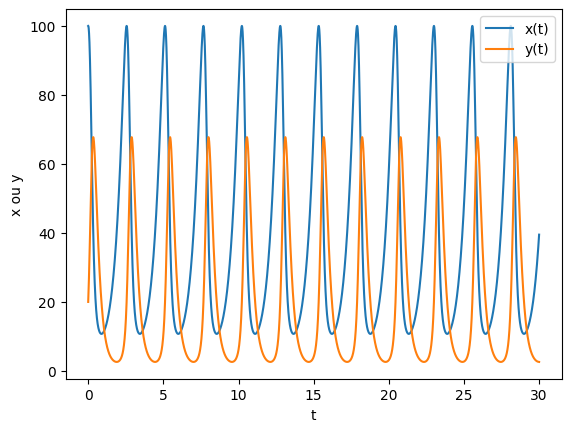

In [2]:
sol = integrate.solve_ivp(f,(0,T),X0,max_step=1e-3)

## affichage du resultat en fonction du temps
plt.figure()
plt.plot(sol.t,sol.y[0],label="x(t)")
plt.plot(sol.t,sol.y[1],label="y(t)")
plt.xlabel("t")
plt.ylabel("x ou y")
plt.legend()
plt.show()

**Q2)** Tracer la solution dans l’espace des phases.

**Q3)** Ajouter les isoclines dans l’espace des phases.

**Q4)** Ajouter d’autres orbites.

**Q5)** Représenter $f$ pour compléter le portrait de phase.

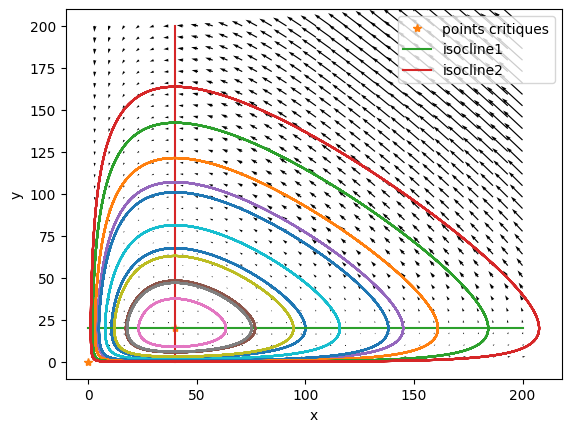

In [3]:

## point critique du systeme
pt_critique_x = np.array([0. , 40.])
pt_critique_y = np.array([0. , 20.])

## isoclines
isocline1_x = np.array([0.,200.])
isocline1_y = np.array([20.,20.])

isocline2_x = np.array([40.,40.])
isocline2_y = np.array([0.,200.])

## affichage de la solution dans le plan des phases
plt.figure()
plt.plot(sol.y[0],sol.y[1])
plt.plot(pt_critique_x, pt_critique_y, marker = '*', label="points critiques",linestyle='None')
# isoclines
plt.plot(isocline1_x, isocline1_y, label="isocline1")
plt.plot(isocline2_x, isocline2_y, label="isocline2")
## autres orbites
for k in np.linspace(0.1,2.0,10):
    X0 = np.array([100.*k, 20.*k])
    sol = integrate.solve_ivp(f,(0,T),X0,max_step=1e-3)
    plt.plot(sol.y[0],sol.y[1])
## ajout de f
x=np.linspace(3,200,30)
y=np.linspace(3,200,30)
X1,Y1=np.meshgrid(x,y)
DX1,DY1=f(0.,[X1,Y1])
plt.quiver(X1,Y1,DX1,DY1)
## finalisation
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
